# Titanic Dataset EDA

## Analysis and Cleaning

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [55]:
titanic =  pd.read_csv('Dataset/Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Columns:

- PassengerId: Unique Id for each passenger

- Survived: 0 = Dead, 1 = Survived

- Pclass: Ticket class with 1 = 1st class, 2 = 2nd class, 3 = 3rd class

- Name: Name of Passenger

- Sex: Gender of male or female

- Age: Age in years

- SibSp: Number of siblings/spouses aboard the Titanic

- Parch: Number of parents/children aboard the Titanic

- Ticket: Ticket number

- Fare: Passenger fare

- Cabin: Cabin number

- Embarked: Port of Embarkation with C = Cherbourg, Q = Queenstown, S = Southampton

In [56]:
titanic.shape

(891, 12)

In [57]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
titanic.isna().sum() / len(titanic) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [61]:
# For embarked column
limit = len(titanic) * 0.05
print(limit)

cols_to_drop = titanic.columns[titanic.isna().sum() <= limit]

print(cols_to_drop)

titanic.dropna(subset=cols_to_drop, inplace=True)


44.550000000000004
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [62]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

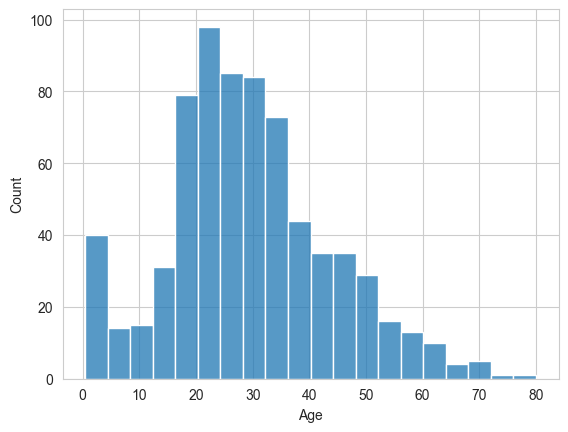

In [63]:
# For Age column
sns.histplot(x=titanic["Age"])
plt.show()

In [64]:
titanic["Age"].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [65]:
# Filling by median
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

In [66]:
titanic["Age"].describe()

count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [67]:
# For Cabin column
titanic = titanic.drop(columns="Cabin")

In [68]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [69]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [70]:
# Unique Values
titanic.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [89]:
titanic["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

## Visualizations

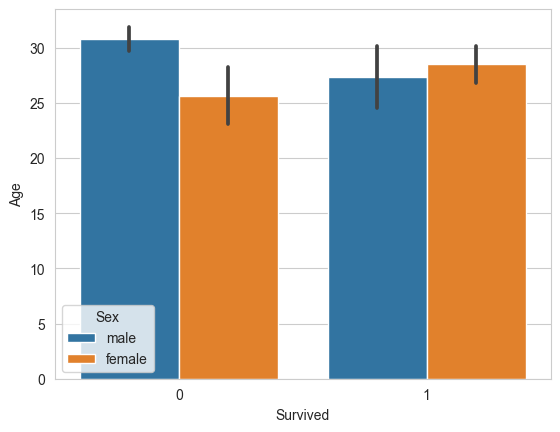

In [99]:
sns.barplot(x="Survived", y="Age", hue="Sex", data=titanic)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

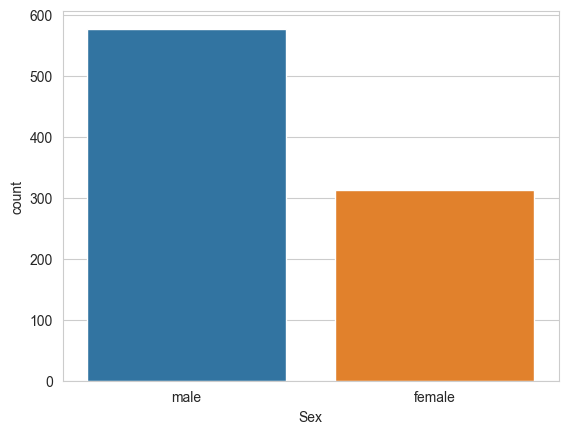

In [72]:
sns.countplot(data=titanic, x="Sex")

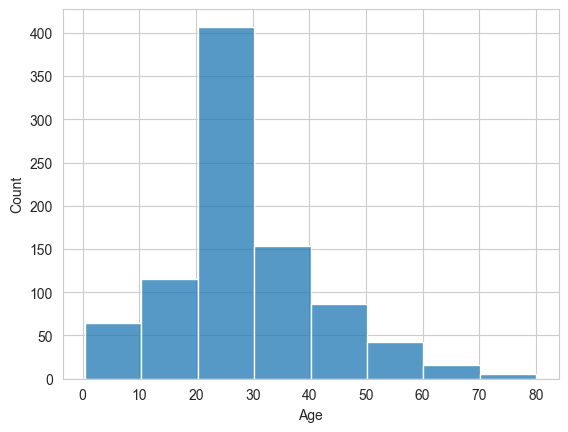

In [73]:
sns.histplot(x="Age", bins=8, data=titanic)
plt.show()

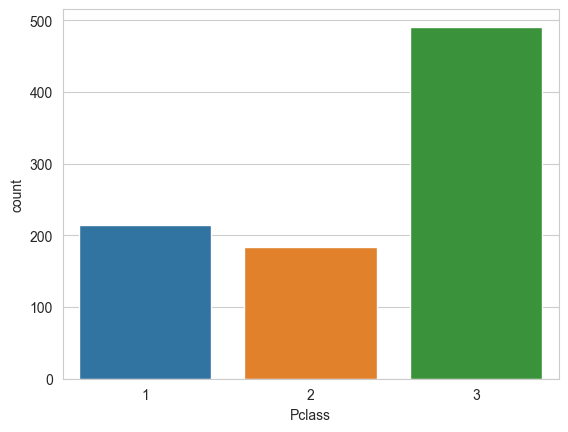

In [100]:
sns.countplot(x="Pclass", data=titanic)
plt.show()

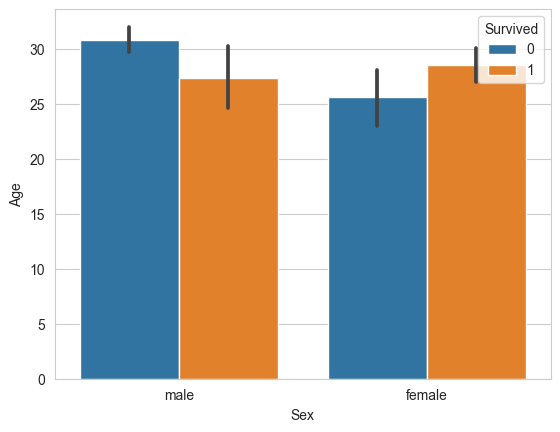

In [76]:
sns.barplot(x="Sex", y="Age", data=titanic, hue="Survived")
plt.show()

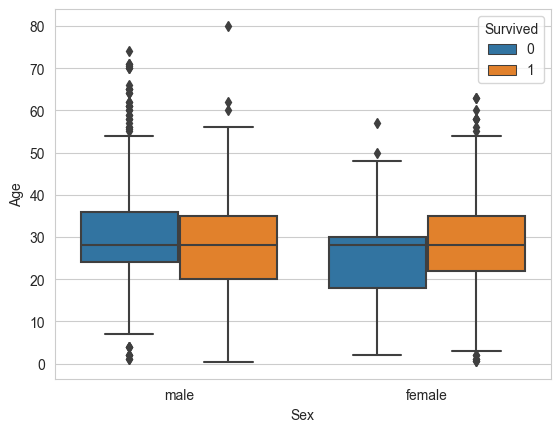

In [77]:
sns.boxplot(x="Sex", y="Age", data=titanic, hue="Survived")
plt.show()

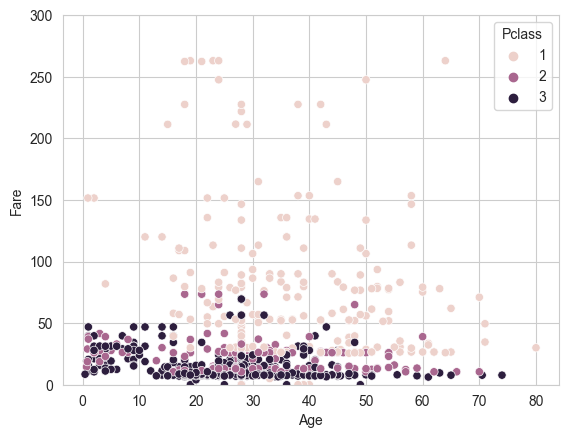

In [78]:
sns.scatterplot(x="Age", y="Fare", data=titanic, hue="Pclass" )
plt.ylim(0,300)
plt.show()

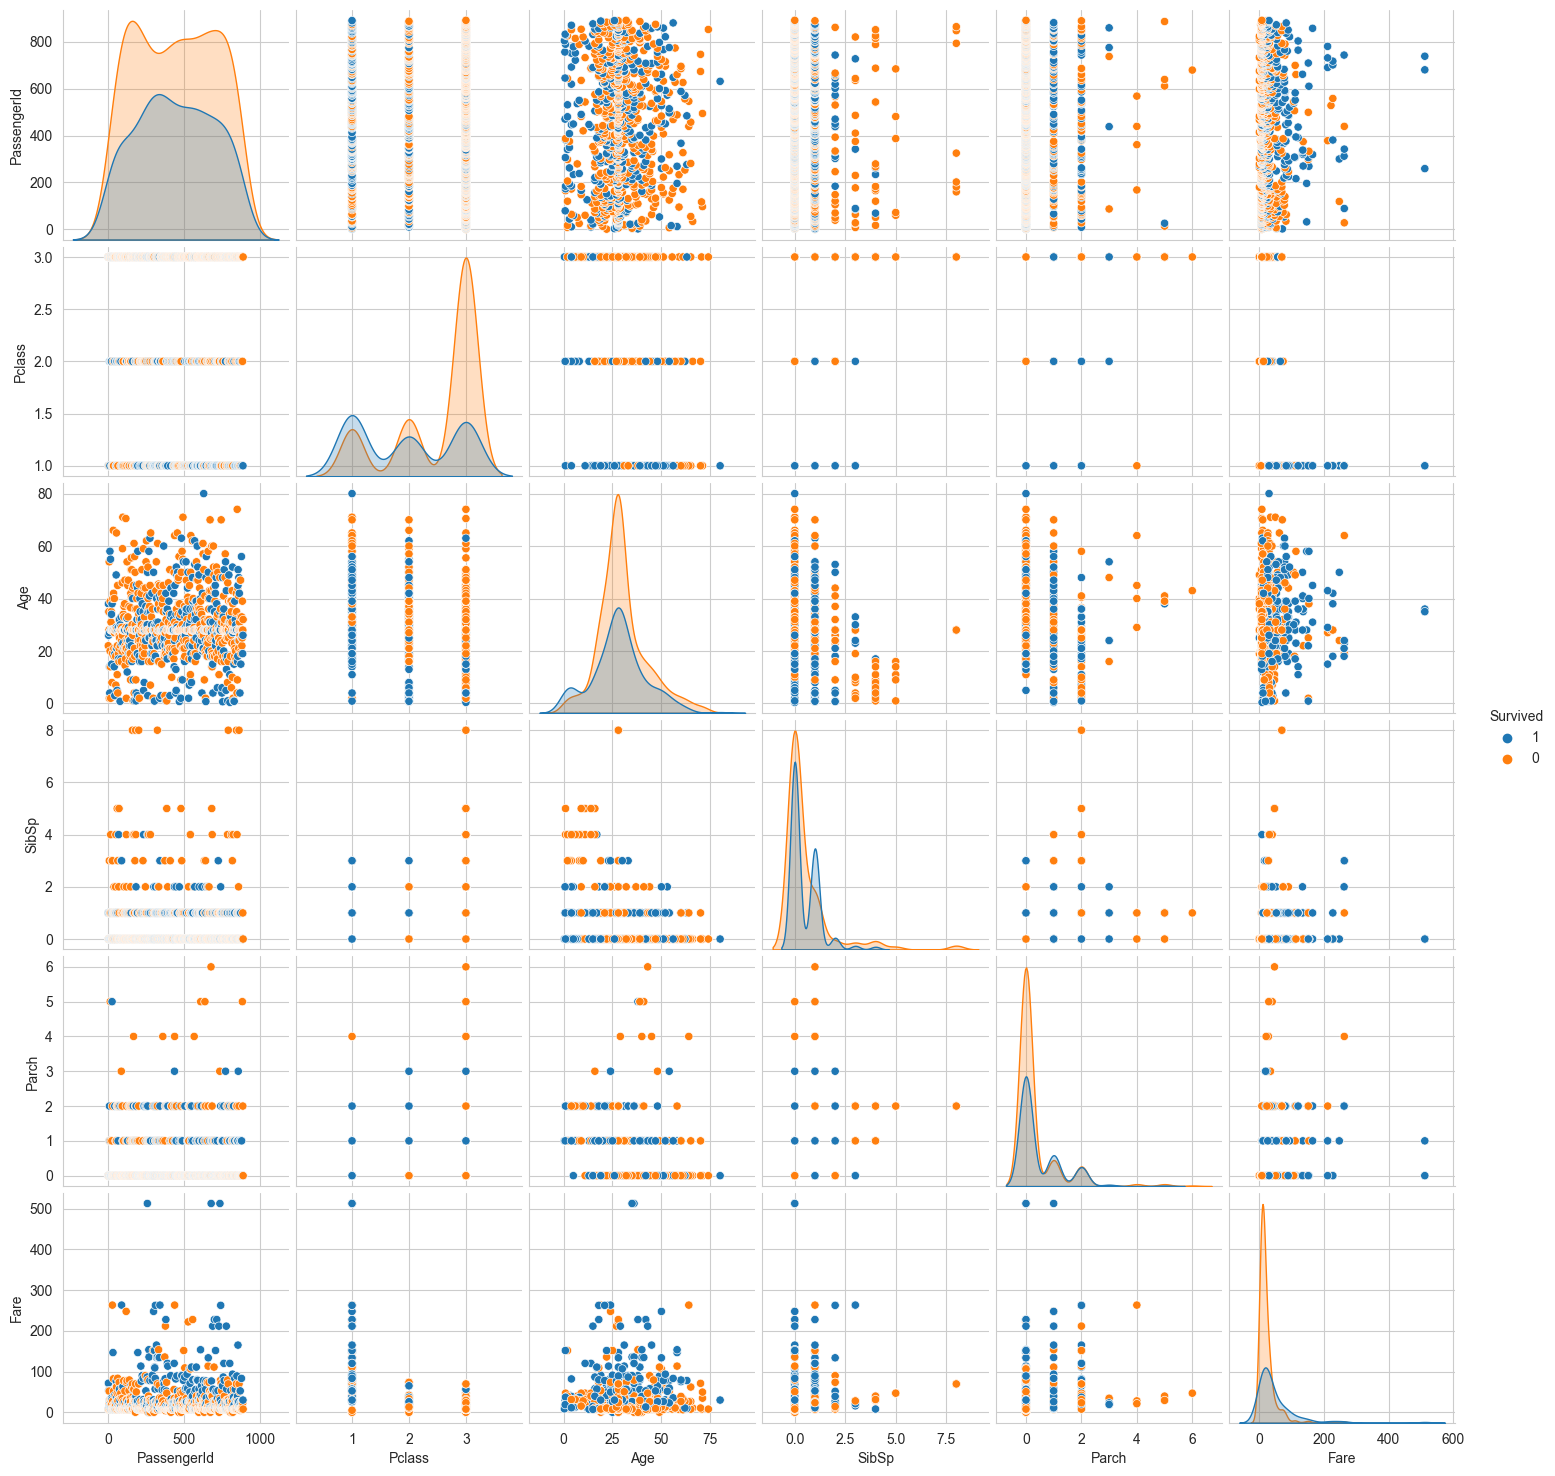

In [80]:
sns.pairplot(data=titanic,hue="Survived", hue_order=[1,0])
plt.show()

<Axes: xlabel='Pclass'>

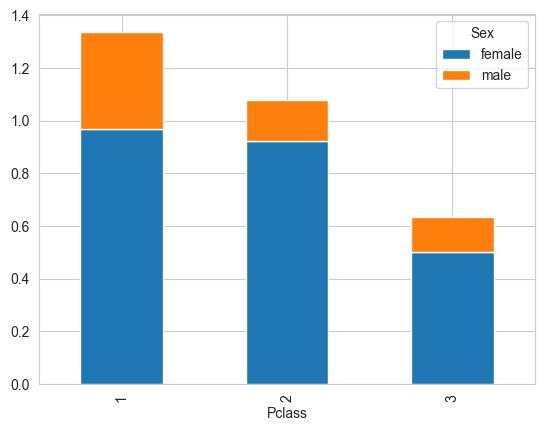

In [81]:
titanic.groupby(["Pclass","Sex"])["Survived"].mean().unstack().plot(kind="bar", stacked=True)

c:\Users\Syeda Anoosha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Syeda Anoosha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Syeda Anoosha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Syeda Anoosha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or us

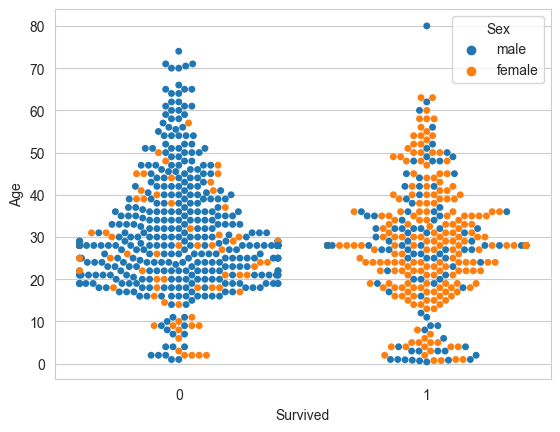

In [82]:
sns.swarmplot(data=titanic, x="Survived", y="Age", hue="Sex")
plt.show()

c:\Users\Syeda Anoosha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Syeda Anoosha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Syeda Anoosha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Syeda Anoosha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or u

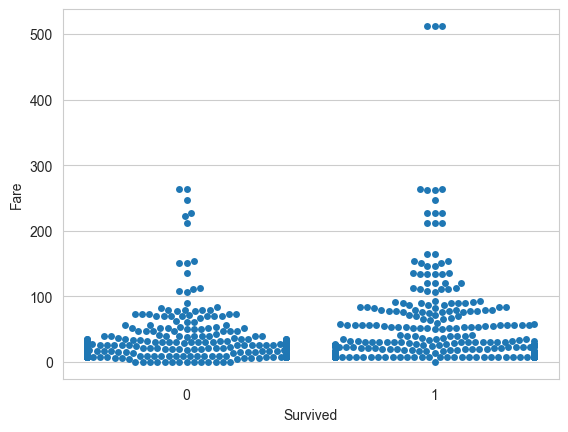

In [83]:
sns.swarmplot(data=titanic, x="Survived", y="Fare")
plt.show()

In [84]:
titanic['age_groups'] = pd.cut(titanic['Age'], bins = [0,1,3,5,12,19,29,64,80], 
        labels=["Infant", "Toddler", "Preschooler", "Child", "Teenager", "Young adult", "Adult", "Old"])
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_groups
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,Young adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Toddler
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Young adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Teenager


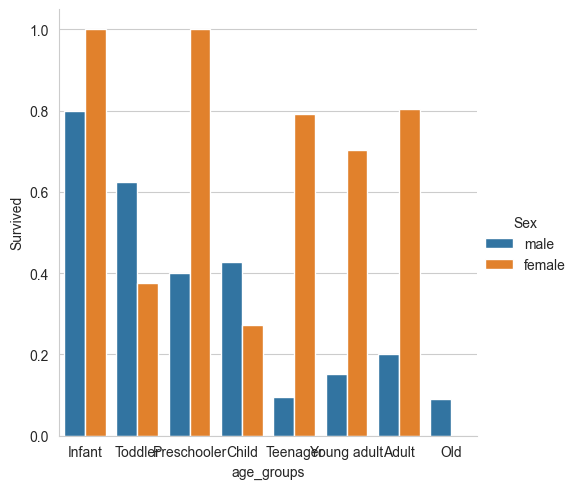

In [85]:
sns.catplot(x="age_groups", y="Survived", hue="Sex", data=titanic, kind="bar", errorbar = None)
plt.show()

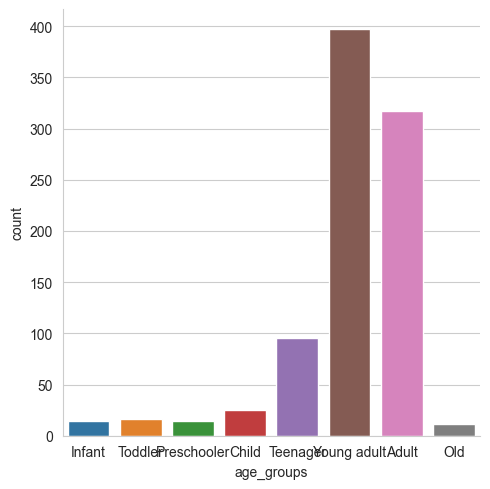

In [86]:
sns.catplot(x="age_groups", data=titanic, kind="count")
plt.show()

<Axes: xlabel='age_groups'>

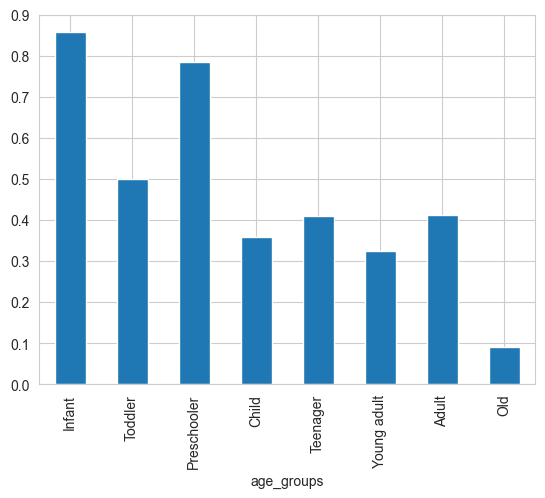

In [87]:
titanic.groupby(["age_groups"])["Survived"].mean().plot(kind="bar")

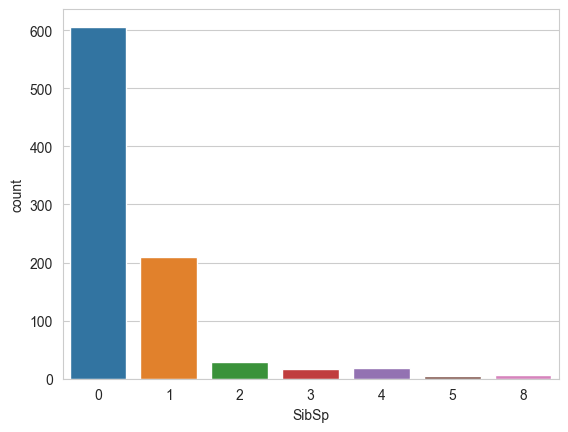

In [88]:
sns.countplot(x=titanic["SibSp"])
plt.show()

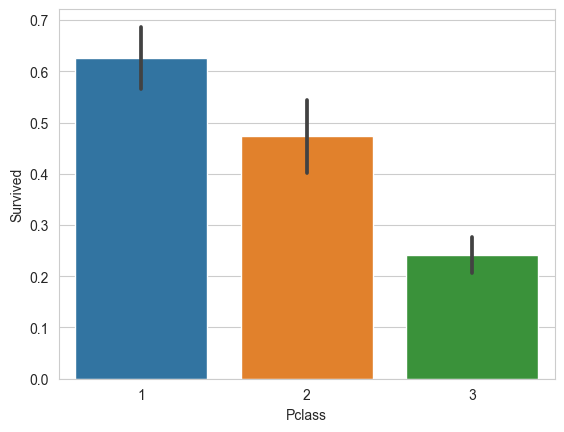

In [93]:
sns.barplot(x=titanic["Pclass"],y=titanic["Survived"])
plt.show()

## Conclusion:
- From the analysis we did above, it is cleared that female sex had a high chance of survival.
- The lowest class or Pclass = 3 were present more but had a less survival rate.
- There may be an infant in the ship as the lowest age is 0.42 which means a four-month old baby.
- The highest age is 80.
- Mean of age is 29.6 means there were more young adults in the ship.
- 